<a href="https://colab.research.google.com/github/olavvn/word2vec_for_fragrance_mapping/blob/main/Word2vec_for_fragrance_mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gensim
import numpy as np
import pprint as pp

In [ ]:
import gensim.downloader
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [ ]:
your_model_code = 'glove-wiki-gigaword-300'
model = gensim.downloader.load(your_model_code)


[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
model.save("model-glove-wiki-gigaword-300")

In [ ]:
def normalize_vector(v):
    norm = np.sqrt(np.sum(v**2))
    return v / norm

def word_analogy_with_vector(model, x_1, x_2, y_1):

    x_1_vector = normalize_vector(model[x_1])
    x_2_vector = normalize_vector(model[x_2])
    y_1_vector = normalize_vector(model[y_1])
    y_2_vector = (x_2_vector - x_1_vector) + y_1_vector
    y_2_vector_normalized = normalize_vector(y_2_vector)

    return y_2_vector_normalized

result_vector = word_analogy_with_vector(model, 'korea', 'seoul', 'japan')
print('result vector is ', result_vector)
assert isinstance(result_vector, np.ndarray), "Output of the function has to be np.ndarray"
a = normalize_vector(model['tokyo'])
print(np.dot(result_vector, a))
b = model.most_similar(result_vector)
print(b)
c = model.most_similar(['seoul', 'japan'], negative=['korea'])
print(c)
print(len(model))



result vector is  [-1.72594227e-02  4.37252559e-02 -2.64645293e-02 -4.89066765e-02
  7.20028654e-02 -4.90101241e-02  2.51877252e-02  3.80230881e-02
 -8.56365543e-03 -1.49099097e-01 -1.50178447e-02  2.46850960e-02
  1.18824519e-01  8.51575360e-02  4.64628227e-02 -4.01640795e-02
 -1.70262102e-02  1.59232728e-02  4.60732132e-02 -3.81703582e-03
 -1.84396747e-02 -1.32302940e-01  8.94108322e-03 -1.66118890e-02
  7.06593413e-03  2.31196936e-02  2.81844679e-02 -7.22691417e-02
 -8.81452020e-03 -2.41232831e-02 -3.29354079e-04 -8.30067769e-02
  2.84875967e-02  4.17554490e-02 -5.47068790e-02 -5.10419793e-02
  1.07823415e-02 -9.92532447e-02 -6.86995611e-02  6.33360893e-02
  5.43381721e-02  3.82378809e-02 -3.56981270e-02 -4.16305512e-02
 -7.50576705e-02 -1.69168797e-03 -3.80818136e-02  5.85596636e-02
 -1.27256900e-01  9.89001915e-02 -2.88286563e-02 -2.38667242e-02
 -3.10896430e-02  1.64883826e-02 -2.79870704e-02  5.44864535e-02
  1.76149271e-02  3.68337110e-02 -1.12221614e-01 -5.62299863e-02
 -5.820

In [ ]:
from numpy import dot

def get_cosine_similarity(model, x, y):
  vector_x = normalize_vector(model[x])
  vector_y = normalize_vector(model[y])

  similarity = dot(vector_x, vector_y)
  return similarity
word_a = 'seoul'
word_b = 'korea'

similarity = get_cosine_similarity(model, word_a, word_b)
print(similarity)
assert -1 <= similarity <= 1, "Similarity has to be between -1 and 1"

print('gensim library result:', model.similarity(word_a, word_b))

0.69181466
gensim library result: 0.69181466


In [ ]:
def analogy(model, x1, x2, y1):
  pp.pprint(model.most_similar([x2, y1], negative=[x1]))

analogy(model, 'english', 'milk', 'spanish')
analogy(model, 'milk', 'english', 'leche')
analogy(model, 'korea', 'dokdo', 'japan')
analogy(model, 'doctor', 'stethoscope', 'chef')
analogy(model, 'apple', 'fruit', 'carrot')
analogy(model, 'fruit', 'apple', 'vegetable')
analogy(model, 'fruit', 'grape', 'vegetable')



[('dairy', 0.49474677443504333),
 ('soy', 0.4567534625530243),
 ('tainted', 0.43346109986305237),
 ('yogurt', 0.43176794052124023),
 ('chocolate', 0.4305379092693329),
 ('meat', 0.42809098958969116),
 ('cheese', 0.4228046238422394),
 ('butter', 0.41646599769592285),
 ('cream', 0.39644482731819153),
 ('sugar', 0.3922494649887085)]
[('fluent', 0.3713277280330658),
 ('clergyman', 0.342074990272522),
 ('linguist', 0.3387399911880493),
 ('welsh', 0.3386596143245697),
 ('gaelic', 0.3386145830154419),
 ('spanish', 0.3369142413139343),
 ('esperanto', 0.3337211608886719),
 ('arabic', 0.3316267132759094),
 ('tagalog', 0.32203537225723267),
 ('dictionary', 0.32192251086235046)]
[('takeshima', 0.6005429029464722),
 ('senkaku', 0.5756986737251282),
 ('diaoyu', 0.5645158290863037),
 ('islets', 0.5059949159622192),
 ('tiaoyutai', 0.4854239523410797),
 ('kuril', 0.4674299359321594),
 ('tiaoyutais', 0.4620523750782013),
 ('kurils', 0.439883828163147),
 ('senkakus', 0.4196641743183136),
 ('hokkaidō', 0.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import plotly.express as px

def display_pca_scatterplot(model, words=None, sample=0):
  if len(words) < 30:
    print("WARNING: For your report, please select more than 30 word samples for the visualization")
    print(f"Current length of input word list: {len(words)}")
  word_vectors = np.array([model[w] for w in words])

  twodim = PCA().fit_transform(word_vectors)[:,:2]

  plt.figure(figsize=(10,10))
  plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
  for word, (x,y) in zip(words, twodim):
       plt.text(x+0.05, y+0.05, word, fontsize=15)
  fig = px.scatter(twodim, x=0, y=1, text=words)
  fig.update_traces(textposition='top center')
  fig.show()



34


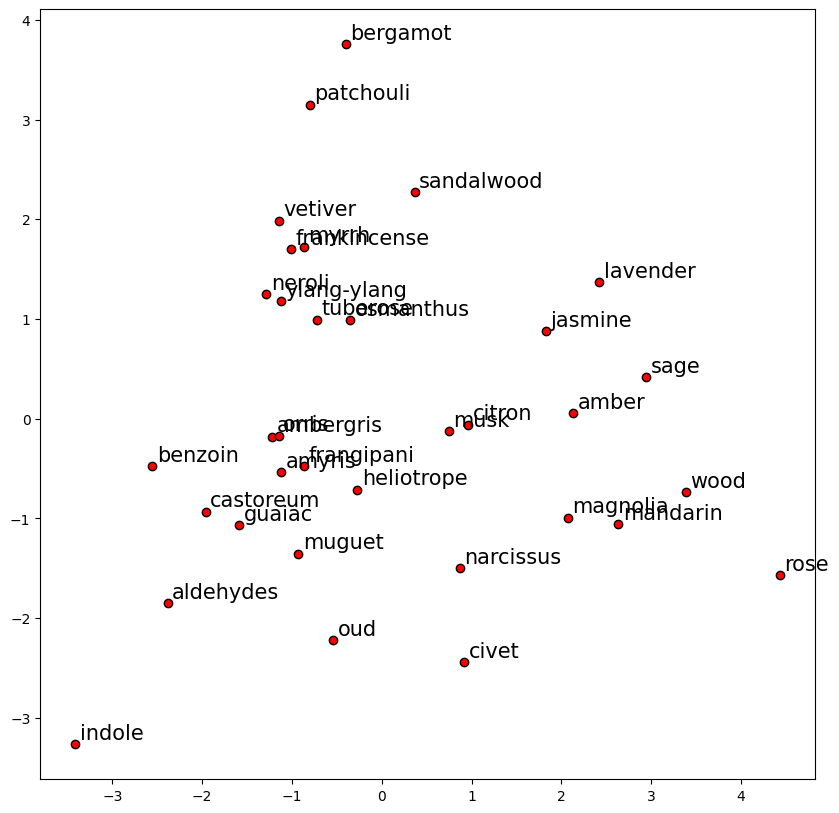

In [ ]:
word_list = ['aldehydes','amber','ambergris', 'amyris',
             'benzoin','bergamot','castoreum','citron',
             'civet','sage','frangipani','frankincense',
             'guaiac','wood','heliotrope','indole','jasmine',
             'lavender','magnolia','mandarin','muguet','musk',
             'myrrh','narcissus','neroli','orris','osmanthus',
             'oud','patchouli','rose','sandalwood','tuberose',
             'vetiver','ylang-ylang'
]

print(len(word_list))
display_pca_scatterplot(model, word_list)

In [ ]:
import string
from gensim.models import Word2Vec

def remove_punctuation(x):
  return x.translate(''.maketrans('', '', string.punctuation))
def make_tokenized_corpus(corpus):
  out= [ [y.lower() for y in remove_punctuation(sentence).split(' ') if y] for sentence in corpus]
  return [x for x in out if x!=[]]

In [ ]:
your_text_fn = '/content/perfume_description.txt'
with open(your_text_fn, 'r', encoding='utf-8', errors='ignore') as f:
  strings = f.readlines()
corpus = make_tokenized_corpus(strings)

print("Checking the first 5 sentences in the text file")
for i in range(5):
  print(f"Sentence {i+1}: {strings[i]}")
print(len(corpus))


Checking the first 5 sentences in the text file
Sentence 1: Applying a fragrance is the final touch to make you feel complete and confident. The great thing about picking out a signature scent is that each perfume or cologne smells different, making it a great way to make a personal statement every time you walk into a room.

Sentence 2: 

Sentence 3: Since ancient times, people have used scented ingredients derived from nature to make fragrances. Today, some of these natural scents and perfume ingredients are still used in the perfume-making process, but with a modern manufacturing method.

Sentence 4: 

Sentence 5: Perfume ingredients include a blend of alcohol, oils, and other aromatic components. Each fragrance has a distinct smell based on how it was made and the various perfume ingredients used in it. Some ingredients in perfume may sound familiar while others appear completely foreign.

3966


In [ ]:
model1 = Word2Vec(sentences=corpus,
                 vector_size=200,
                 window=5,
                 min_count=2,
                 sg=1,
                 negative=10,
                 workers=4)

model1 = model1.wv

34


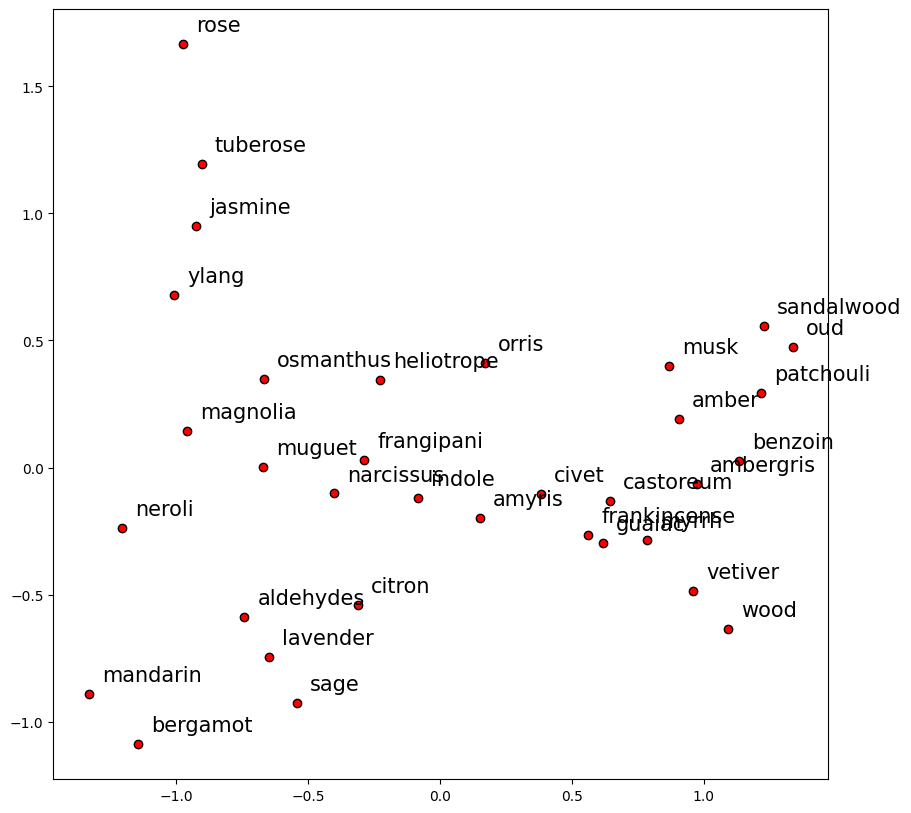

In [ ]:
word_list = ['aldehydes','amber','ambergris', 'amyris',
             'benzoin','bergamot','castoreum','citron',
             'civet','sage','frangipani','frankincense',
             'guaiac','wood','heliotrope','indole','jasmine',
             'lavender','magnolia','mandarin','muguet','musk',
             'myrrh','narcissus','neroli','orris','osmanthus',
             'oud','patchouli','rose','sandalwood','tuberose',
             'vetiver','ylang'
]
display_pca_scatterplot(model1, word_list)
print(len(word_list))

In [ ]:
def analogy(model1, x1, x2, y1):
  pp.pprint(model1.most_similar([x2, y1], negative=[x1]))

print(analogy(model, 'neroli', 'floral', 'sandalwood'))
print(analogy(model1, 'neroli', 'floral', 'sandalwood'))

[('flowers', 0.4777246415615082),
 ('flower', 0.461261510848999),
 ('adorned', 0.45864105224609375),
 ('ornaments', 0.4481959342956543),
 ('incense', 0.4429246783256531),
 ('decorative', 0.4398514926433563),
 ('bouquet', 0.4307063817977905),
 ('embroidered', 0.42718830704689026),
 ('lace', 0.42621755599975586),
 ('carvings', 0.42481768131256104)]
None
[('patchouli', 0.69670569896698),
 ('vanilla', 0.6926760673522949),
 ('amber', 0.6913019418716431),
 ('benzoin', 0.691146969795227),
 ('tonka', 0.6843622326850891),
 ('cedarwood', 0.6829566359519958),
 ('animalic', 0.6752651929855347),
 ('base', 0.6719072461128235),
 ('labdanum', 0.6650844216346741),
 ('bean', 0.6644149422645569)]
None
